# Lucas Oliveira Machado de Sousa

This practical work, on motion estimation, has 3 different parts, corresponding to three families of algorithms that we have seen in class:
- Block matching algorithms
- Optic flow
- Parametric motion estimation.

You are asked to complete the different algorithms and to try it. Also, please answer to the theoretical questions, in the notebook.

In [30]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from me_ssd import me_ssd
from displayMVF import displayMVF
from fracMc import fracMc
from PSNR import PSNR
from me_sad import me_sad
from HornSchunck import HS
#from applyAffineMotion import applyAffineMotion
#from angle2D import angle2D
#from gradient import gradient
#from medianFilter import medianFilter

# I - Block matching algorithms
## I-1 - Unregularized algorithms
### I-1-a - Unregularized SSD-based algorithm

First, read the two images 'flower_cif_1.mat' and 'flower_cif_1.mat', which are two consecutive frames of a video sequence. You will have to estimate the motion between these frame, using block matching algorithms.

In [31]:
im1 = loadmat('flower_cif_1.mat')['im1']
im1 = im1.astype('float')
im2 = loadmat('flower_cif_2.mat')['im2']
im2 = im2.astype('float')

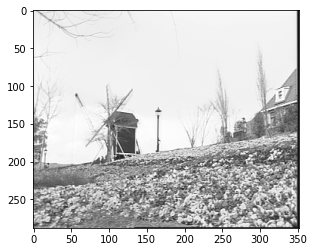

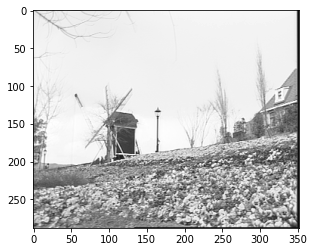

In [32]:
plt.figure(),plt.imshow(im1,cmap='gray')
plt.figure(),plt.imshow(im2,cmap='gray')
plt.show()

First, you will have to encode a block matching using the SSD criterion. Some default values of the algorithm are given below: the number of column and rows in each block, and the search radius.

In [33]:
brow = 16 # Number of rows per block
bcol = 16 # Number of columns per block
search_radius = 8 # Search radius

Code the me_ssd function in the me_ssd file. First, implement the unregularized function.

In [34]:
mvf_ssd, prediction =  me_ssd(im2, im1, brow, bcol, search_radius)

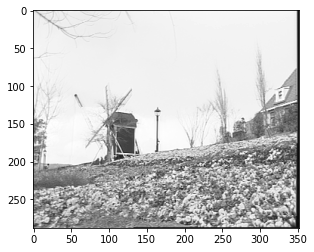

In [35]:
plt.imshow(prediction, cmap='gray')

Show the motion vector field using the displayMVF function. Write your remarks. Are there errors? If yes, where and why?

Change the block size and the search area radius. How does it impact your results?

**Answer:** Yes, there are errors in the regions that look very homogeneous (the motion vector field seems quite random when there's nothing but clouds). With a bigger block size, there are less areas with errors, and with a bigger search area radius the motion vectors seem weaker.

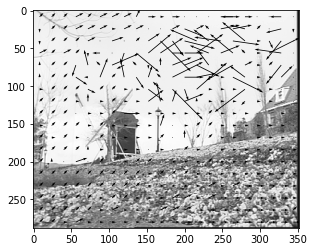

In [36]:
displayMVF(im1, mvf_ssd, search_radius*2)

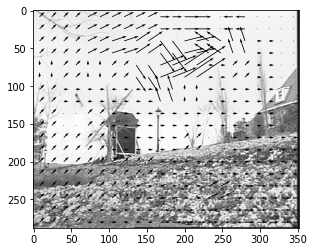

In [37]:
mvf_ssd2, prediction =  me_ssd(cur=im2, ref=im1, brow=32, bcol=32, search=search_radius)
displayMVF(im1, mvf_ssd2, search_radius*2)

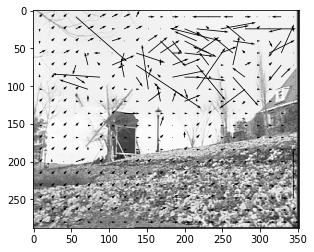

In [39]:
mvf_ssd3, prediction =  me_ssd(cur=im2, ref=im1, brow=16, bcol=16, search=16)
displayMVF(im1, mvf_ssd3, search_radius*2)

Motion compensation: now that we have the movement vector field, we can compute the motion compensated image. Display the motion compensated image. What can you observe ?

**Answer:** The SSD dissimilarity measure highlights errors, it's not robust to outliers. 

TO DO : code the motion compensation function (done)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7fc16963df50>)

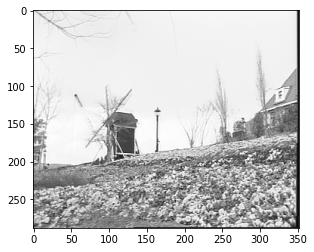

In [8]:
mc_ssd = fracMc(im1,mvf_ssd)
plt.figure(),plt.imshow(mc_ssd,cmap='gray')

Compute the PSNR between the motion compensated and the current images.

What is the definition of PSNR ?

**Answer:** PSNR is the "Peak Signalto Noise Ratio", and is defined as follows:

$PSNR(Im_1, Im_2) = 10 log_{10} \left(\frac{d^2}{\frac{1}{mn}||Im_1-Im_2||^2} \right) $,

where $m, n$ is the image size and $d$ is the peak signal (255 in this case, since we're coding the image in 8 bits). This is a measure of distortion on the images.

Code the PSNR function. Compute it using the BM algorithm results, with different parameter values.

In [9]:
psnr_ssd = PSNR(im2,mc_ssd)
print(psnr_ssd)

22.706094842153128


### I-1-b Unregularized SAD-based algorithm
Now, we will use the SAD as a metric for the block matching algorithm. To do that, implement the me_sad algorithm. Please note that you function should be very similar to me_ssd, except for the metric (as such, as a starting point, you can copy paste what you have proposed for me_ssd).

In [10]:
mvf_sad,prediction =  me_sad(im2, im1, brow, bcol, search_radius)

Show the motion vector field using the displayMVF function.

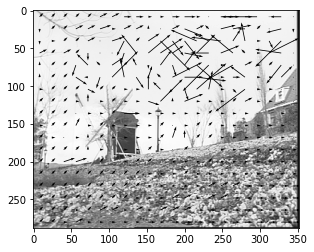

In [11]:
displayMVF(im1, mvf_sad, search_radius*2)

Motion compensation: compute the motion compensated image and display it. In addition, compute the PSNR.

Comment the difference observed between SSD and SAD in terms of regularity of the motion vector field, PSNR of the predicition and impact of the block size.

**Answer:** Both SSD and SAD provide a similar result in terms of PSNR, but the motion field is smoother with the SAD measure than with the l2 norm. 

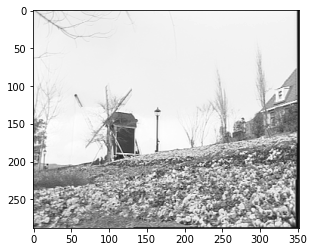

In [12]:
mc_sad = fracMc(im1,mvf_sad)
plt.figure(),plt.imshow(mc_sad,cmap='gray')
plt.show()

In [13]:
psnr_sad = PSNR(im2,mc_sad)
print(psnr_sad)

22.624557198318897


## I-2- Regularized algorithms
Now, we will add a regularization term to the metrics (SSD and then SAD) we previously used.
### I-2-1- Regularized SSD-based algorithm

TO DO : code the regularized SSD-based algorithm. (done)
For the sake of simplicity, the regularizing function is already given. How does it work and what does it compute?

Try several parameter values, and compare your results with the unregularized algorithms.

**Answer:** We add a regularizing term to the cost function to introduce a smoothness constraint (the difference of (i,j) and a vector representing the neighborhood, for instance). The term lambda controls the trade-off between smoothness and accuracy (minimization of the norm).

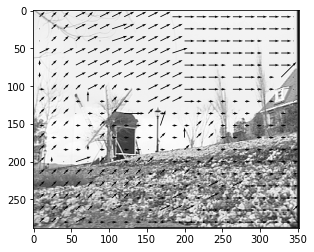

In [14]:
mvf_ssd_reg, prediction =  me_ssd(im2, im1, brow, bcol, search_radius, lamb=1)
displayMVF(im2, mvf_ssd_reg, search_radius*2)

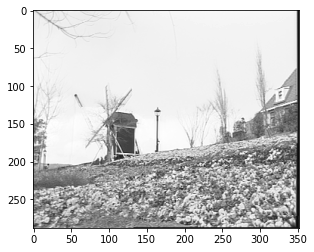

In [15]:
mc_ssd_reg = fracMc(im1,mvf_ssd_reg)
plt.figure(),plt.imshow(mc_ssd_reg,cmap='gray')
plt.show()

In [16]:
psnr_ssd_reg = PSNR(im2,mc_ssd_reg)
print(psnr_ssd_reg)

22.70560211521233


### I-2-2- Regularized SAD-based algorithm

TO DO : code the regularized SAD-based algorithm. (done)

Try several parameter values, and compare your results with the unregularized algorithms and the regularized SSD-based algorithm.

**Answer:** The comparison of the regularized and unregularized results speak for itself, we see clearly the difference that the regularization term makes (we have no longer parts of the motion field that appear random). In comparison to SSD, we see again how the motion field using the SAD-based algorithm is smoother (we don't have that sudden change of vectors orientation on the top right of the image, as it is for the SSD case).

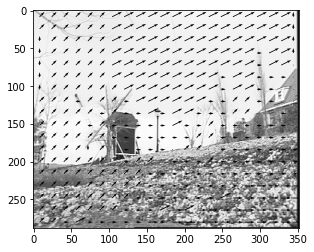

In [17]:
mvf_sad_reg, prediction =  me_sad(im2, im1, brow, bcol, search_radius, lamb=1)
displayMVF(im2, mvf_sad_reg, search_radius*2)

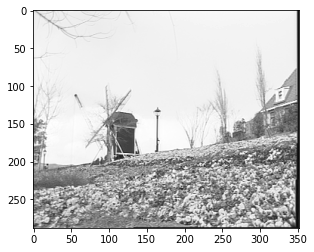

In [18]:
mc_sad_reg = fracMc(im1,mvf_sad_reg)
plt.figure(),plt.imshow(mc_sad_reg,cmap='gray')
plt.show()

In [19]:
psnr_sad_reg = PSNR(im2,mc_sad_reg)
print(psnr_sad_reg)

22.566956865323764


# Optical flow

You will now implement the Horn and Schunck algorithm to estimate the optic flow.

In [20]:
im1 = loadmat('akiyo_cif1.mat')['im1']
im1 = im1.astype('float')
im2 = loadmat('akiyo_cif2.mat')['im2']
im2 = im2.astype('float')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7fc167214610>)

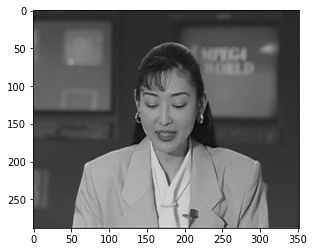

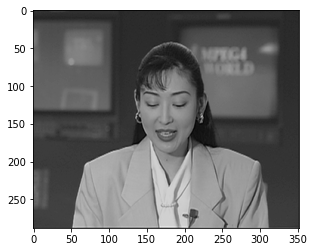

In [21]:
plt.figure(),plt.imshow(im1,cmap='gray')
plt.figure(),plt.imshow(im2,cmap='gray')

Compute the optical flow by filling the gaps in the Horn and Schunck function. You can use the motion field that you estimated before with the block matching algorithms to initialize you algorithm.

As a reminder, the optical flow is implemented by the iterative Horn and Schunck's algorithm:
$$
u^{n+1} = \bar{u}^n - f_x \frac{\bar{u}^n f_x + \bar{v}^n f_y + f_t}{\alpha^2 + \|\nabla f\|^2}
$$
$$
v^{n+1} = \bar{v}^n - f_y \frac{\bar{u}^n f_x + \bar{v}^n f_y + f_t}{\alpha^2 + \|\nabla f\|^2}
$$
where $u^n$ is the value of the $u$ component at the $n$-th iteration, and $\bar{u}$ is the local average of $u$.

In [24]:
brow = 16; bcol=16; search_radius = 13;

alpha = 100
ite = 100

# u -> direction x, columns
# v -> direction y, rows
uInitial = mvf_ssd_reg[:,:,1] # Rem: pay attention to the inversion of the order compare to me_ssd.
vInitial = mvf_ssd_reg[:,:,0]
[u, v] = HS(im2, im1, uInitial, vInitial, alpha, ite,blur=1.)

Display the motion field and compute the PSNR. Do you observe any improvement compare to block-matching algorithms? Explain. You can test on both the Akiyo and Flowers images.

**Answer:** A very important quantitative result is that the PSNR is much higher with the optical flow method. The motion field seems smoother than the BM method with SSD (but less smooth than with SAD measure). The greatest difficulty of this method is the critical choice of the value of $\alpha$ (in terms of smoothness and numerical stability).

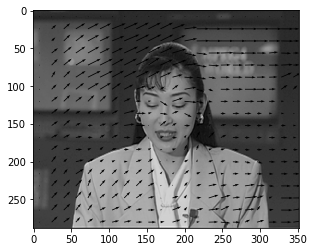

In [28]:
mvf_hs = np.zeros((np.shape(v)[0],np.shape(v)[1],2))
mvf_hs[:,:,0] = v
mvf_hs[:,:,1] = u
displayMVF(im1,mvf_hs,16)

mc_hs = fracMc(im1,mvf_hs)
psnr_hs = PSNR(im2,mc_hs)

In [26]:
psnr_hs

32.08084310576777